In [1]:
from scipy.optimize import linprog
import numpy as np

In [2]:
import time

In [29]:
def scipy_simplex(n):
  c = []
  bnd = []
  for _ in range(n):
    c.append(-1*(10**(n-1)))
    bnd.append((0, None))

  res_left = []
  res_right = []

  for i in range(1,n+1):
    tmp = [0 for i in range(n)]
    if i == 1:
      pass
    else:
      for j in range(1,i):
        tmp[j-1] = 2*(10**(i-j))
    tmp[i-1] = 1
    res_left.append(tmp)
    res_right.append(100**(i-1))

  t1 = time.perf_counter()
  res = linprog(c, res_left, res_right, bounds=bnd, method='revised simplex')
  t2 = time.perf_counter()
  print("Objective = {}".format(res.get('fun') * -1))
  return round(t2-t1,5)

In [21]:
ns = [i for i in range(5,101)]

In [30]:
ti = []

for n in ns:
  tmp = scipy_simplex(n)
  ti.append(tmp)

Objective = 1000000000000.0
Objective = 1000000000000000.0
Objective = 1e+18
Objective = 1e+21
Objective = 1e+24
Objective = 1e+27
Objective = 1e+30
Objective = 9.999999999999998e+32
Objective = 8.117991996228372e+35
Objective = 8.117991996228372e+36
Objective = 8.117991996228372e+37
Objective = 8.117991996228373e+38
Objective = 8.117991996228372e+39
Objective = 8.117991996228372e+40
Objective = 8.117991996228373e+41
Objective = 8.117991996228371e+42
Objective = 8.117991996228372e+43
Objective = 8.117991996228372e+44
Objective = 8.117991996228372e+45
Objective = 8.117991996228372e+46
Objective = 8.117991996228372e+47
Objective = 8.117991996228374e+48
Objective = 8.117991996228372e+49
Objective = 8.117991996228374e+50
Objective = 8.117991996228373e+51
Objective = 8.117991996228371e+52
Objective = 8.117991996228372e+53
Objective = 8.117991996228373e+54
Objective = 8.117991996228373e+55
Objective = 8.117991996228372e+56
Objective = 8.117991996228371e+57
Objective = 8.117991996228372e+58
O

In [9]:
import pandas as pd
import numpy as np

In [32]:
srs = pd.DataFrame({'n':ns,'time':ti}, columns=['n','time'])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

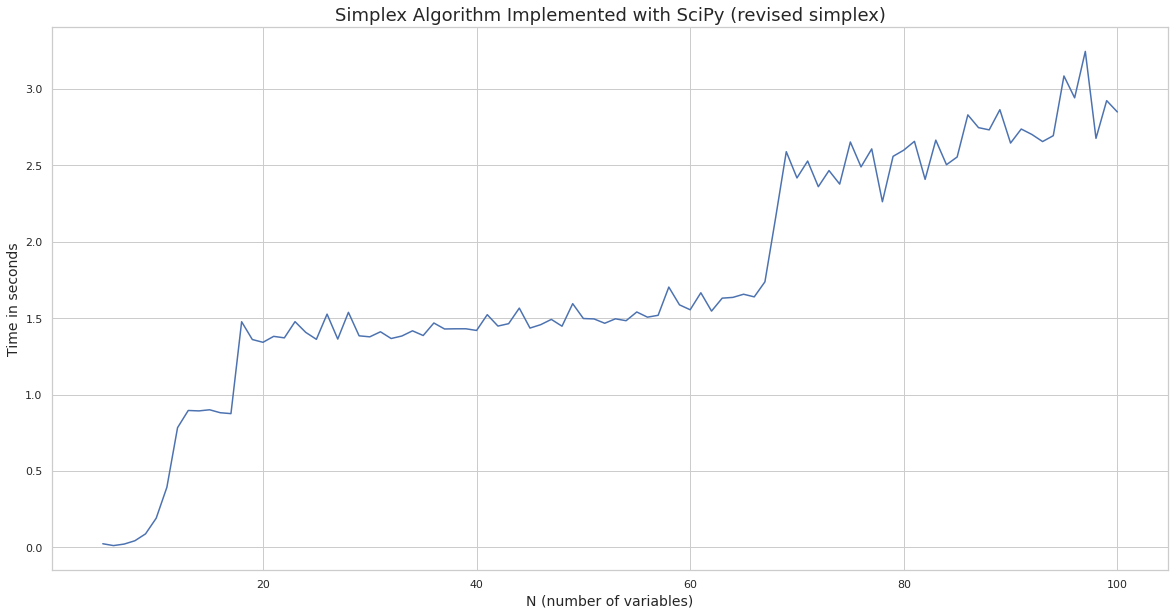

In [34]:
ax = sns.lineplot(x=srs.n, y=srs.time)
ax.set_title('Simplex Algorithm Implemented with SciPy (revised simplex)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('revised_simplex_scipy_one')

In [36]:
ti = []
for _ in range(10):
  part_time = []
  for n in ns:
    tmp = scipy_simplex(n)
    part_time.append(tmp)

  ti.append(part_time)

Objective = 1000000000000.0
Objective = 1000000000000000.0
Objective = 1e+18
Objective = 1e+21
Objective = 1e+24
Objective = 1e+27
Objective = 1e+30
Objective = 9.999999999999998e+32
Objective = 8.117991996228372e+35
Objective = 8.117991996228372e+36
Objective = 8.117991996228372e+37
Objective = 8.117991996228373e+38
Objective = 8.117991996228372e+39
Objective = 8.117991996228372e+40
Objective = 8.117991996228373e+41
Objective = 8.117991996228371e+42
Objective = 8.117991996228372e+43
Objective = 8.117991996228372e+44
Objective = 8.117991996228372e+45
Objective = 8.117991996228372e+46
Objective = 8.117991996228372e+47
Objective = 8.117991996228374e+48
Objective = 8.117991996228372e+49
Objective = 8.117991996228374e+50
Objective = 8.117991996228373e+51
Objective = 8.117991996228371e+52
Objective = 8.117991996228372e+53
Objective = 8.117991996228373e+54
Objective = 8.117991996228373e+55
Objective = 8.117991996228372e+56
Objective = 8.117991996228371e+57
Objective = 8.117991996228372e+58
O

In [37]:
ten_exp = pd.DataFrame(ti, columns=ns)
ten_avg = ten_exp.mean()

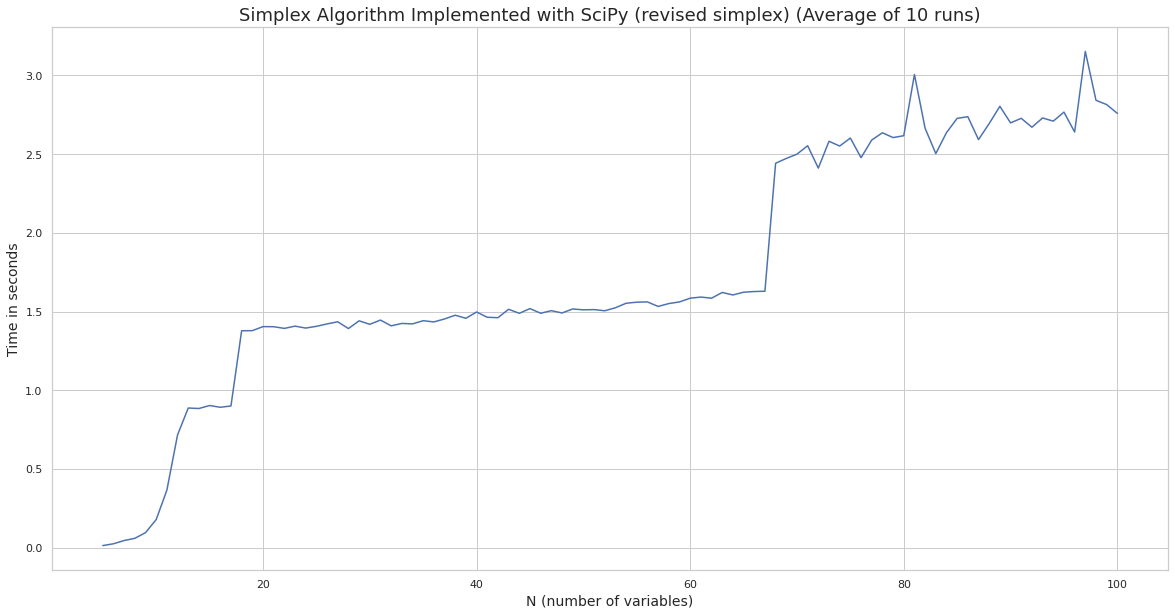

In [38]:
ax = sns.lineplot(x=ten_avg.index, y=ten_avg.values)
ax.set_title('Simplex Algorithm Implemented with SciPy (revised simplex) (Average of 10 runs)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('revised_simplex_scipy_ten')

In [61]:
def scipy_simplex_v2(n):
  c = []
  bnd = []
  for _ in range(n):
    c.append(-1*(10**(n-1)))
    bnd.append((0, None))

  res_left = []
  res_right = []

  for i in range(1,n+1):
    tmp = [0 for i in range(n)]
    if i == 1:
      pass
    else:
      for j in range(1,i):
        tmp[j-1] = 2*(10**(i-j))
    tmp[i-1] = 1
    res_left.append(tmp)
    res_right.append(100**(i-1))

  t1 = time.perf_counter()
  res = linprog(c, res_left, res_right, bounds=bnd) # interior-point method, because simple method in scipy has issues with floating point
  t2 = time.perf_counter()
  #print("Objective = {}".format(res.get('fun') * -1))
  return round(t2-t1,5)

In [63]:
ti = []

for n in ns:
  tmp = scipy_simplex_v2(n)
  ti.append(tmp)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.88221e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.64787e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.35055e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.05621e-232): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matr

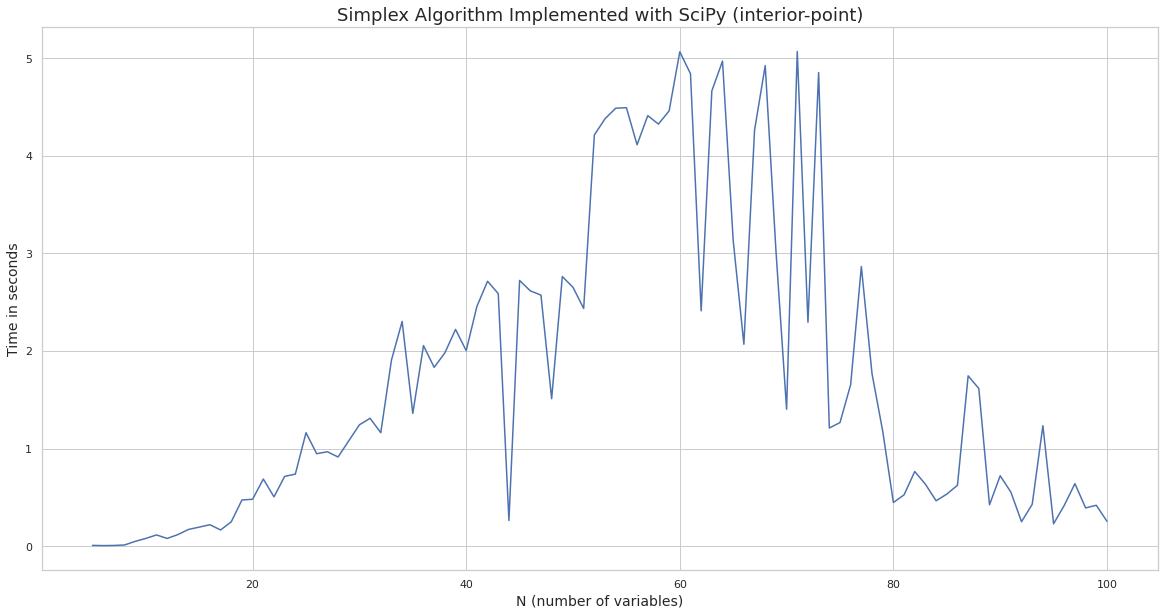

In [65]:
srs = pd.DataFrame({'n':ns,'time':ti}, columns=['n','time'])

ax = sns.lineplot(x=srs.n, y=srs.time)
ax.set_title('Simplex Algorithm Implemented with SciPy (interior-point)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('intpoint_scipy_one')

In [66]:
ti = []
for _ in range(10):
  part_time = []
  for n in ns:
    tmp = scipy_simplex_v2(n)
    part_time.append(tmp)

  ti.append(part_time)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.88221e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.64787e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.35055e-233): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.05621e-232): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matr

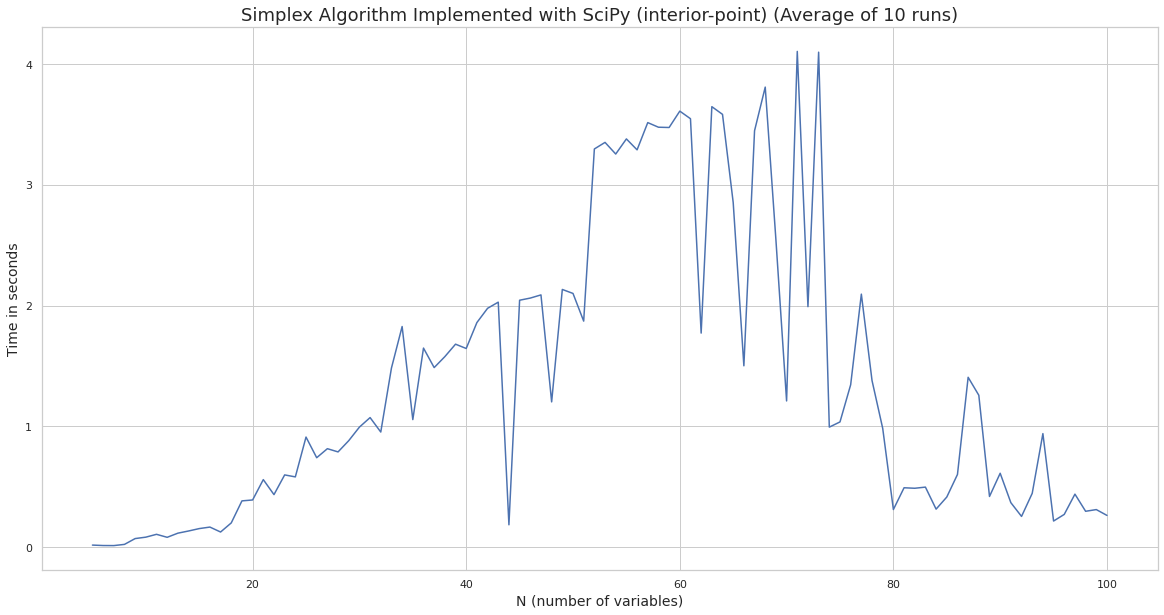

In [67]:
ten_exp = pd.DataFrame(ti, columns=ns)
ten_avg = ten_exp.mean()

ax = sns.lineplot(x=ten_avg.index, y=ten_avg.values)
ax.set_title('Simplex Algorithm Implemented with SciPy (interior-point) (Average of 10 runs)', fontsize=18)
ax.set_ylabel('Time in seconds', fontsize=14)
ax.set_xlabel('N (number of variables)', fontsize=14)
plt.savefig('intpoint_scipy_ten')